In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv(r"\Users\kandy\Downloads\Loan prediction train.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**DATA CLEANING**

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.drop(columns=["Loan_ID"], axis =1, inplace = True)

In [9]:
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Dependents"] = df["Dependents"].bfill(axis = "rows")
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])


In [10]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
df["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [13]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

**EXPLORATORY DATA ANALYSIS**

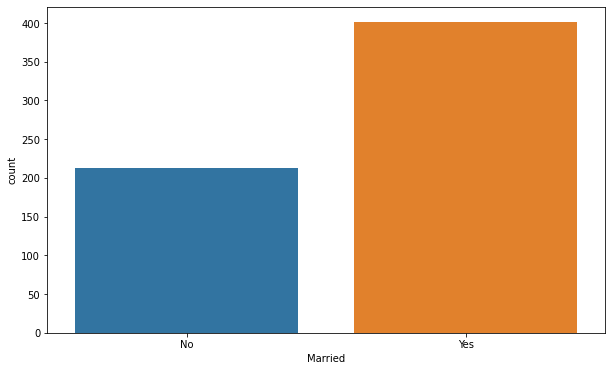

In [14]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = "Married")
plt.show()

OBSERVATION: From the graph above you can see that we have more of married people in the dataset that applied for loan.

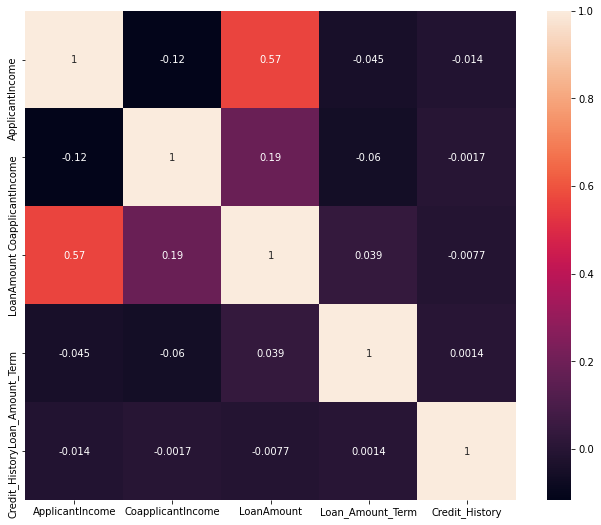

In [15]:
plt.subplots(figsize = (11,9))
sns.heatmap(df.corr(), annot = True)
plt.show()

OBSERVATION: From the heatmap above, you can see a possitive correlation between appliant income and loan amount, meaning the
    higher the individual income, the higher the loan amount applied for.

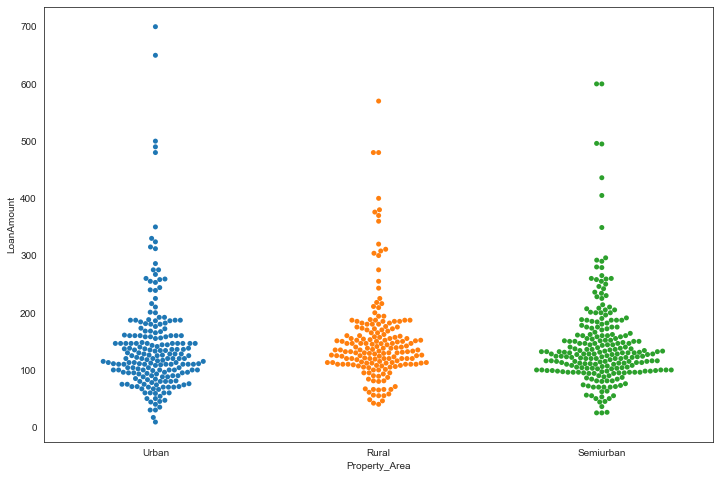

In [16]:
plt.figure(figsize = (12,8))
sns.set_style("white")
sns.swarmplot(x = "Property_Area", y = "LoanAmount", data = df )
plt.show()

OBSERVATION: From the graph above, we noticed that we had more people that have property in semiurban. That is why the dataset is concentrated more
    in semiurban.we also noticed that people that have property in urban area applied for higher amount of loan.

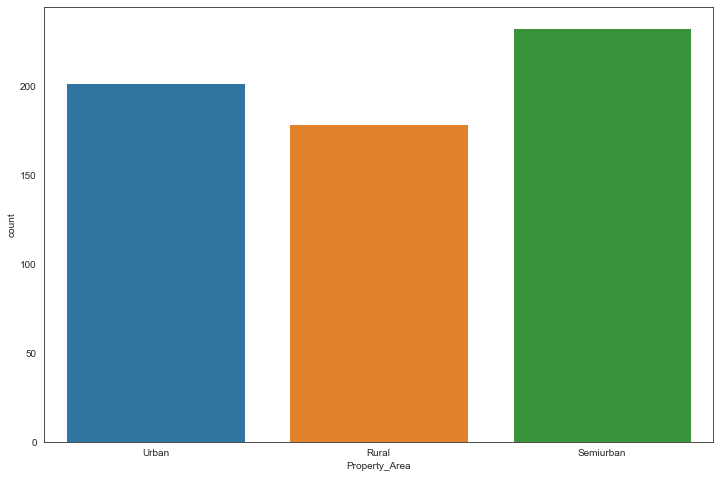

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(data = df, x = "Property_Area")
plt.show()

OBSERVATION: We have more people from semiurban, followed by urban before rural that applied for loan.

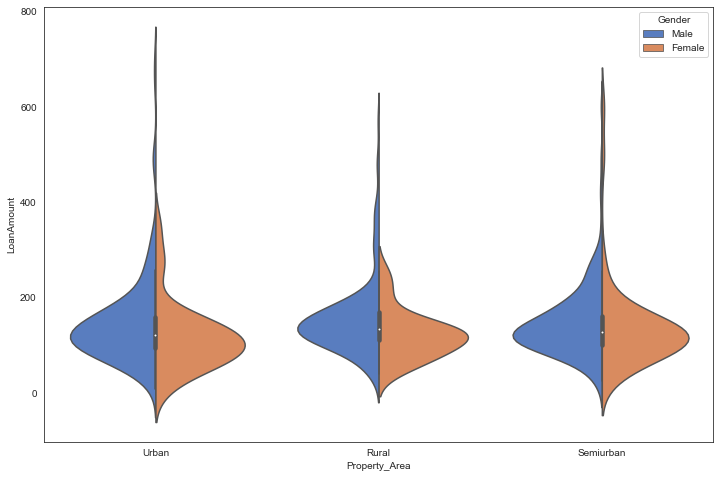

In [18]:
plt.figure(figsize = (12,8))
sns.violinplot(x = "Property_Area", y = "LoanAmount", hue = "Gender", palette = "muted", split = True, data = df)
plt.show()

OBSERVATION: In the graph above we can see the median and interquatile range for urban, rural and semiurban.

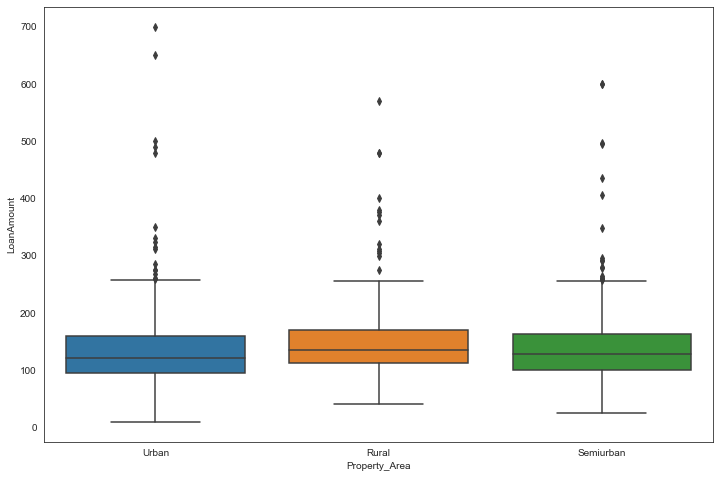

In [19]:
plt.figure(figsize = (12,8))
sns.boxplot(x = "Property_Area", y = "LoanAmount", data = df)
plt.show()

OBSERVATION:We can see that there are outliers in the property area of the dataset.

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

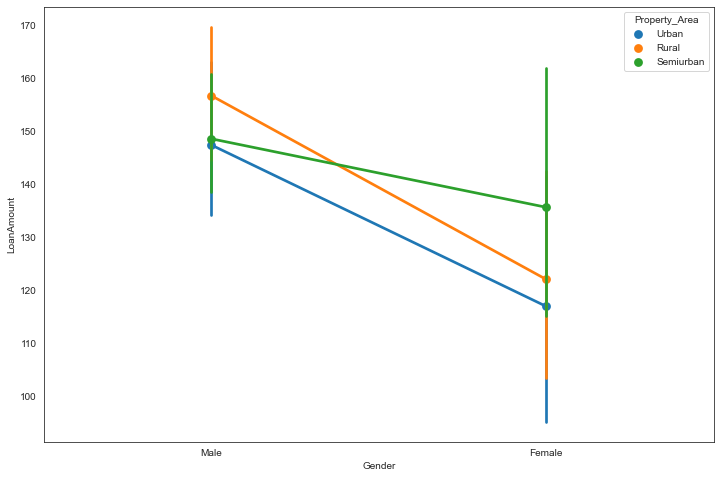

In [20]:
plt.figure(figsize = (12,8))
sns.pointplot(x = "Gender", y = "LoanAmount", hue = "Property_Area", data = df)

OBSERVATION: From the point plot above, it is observed that male that has property in rural area apllied for higher amount of loan
    than male that has property in semi urban and urban, also male that has property in semi urban area apllied for higher loans than male that has property in urban area. 
    Female that has property in semi urban area applied for higher loan than female that has property in rural and urban area, also female that has property in rural area applied for 
    more loans than female that has property in urban area.

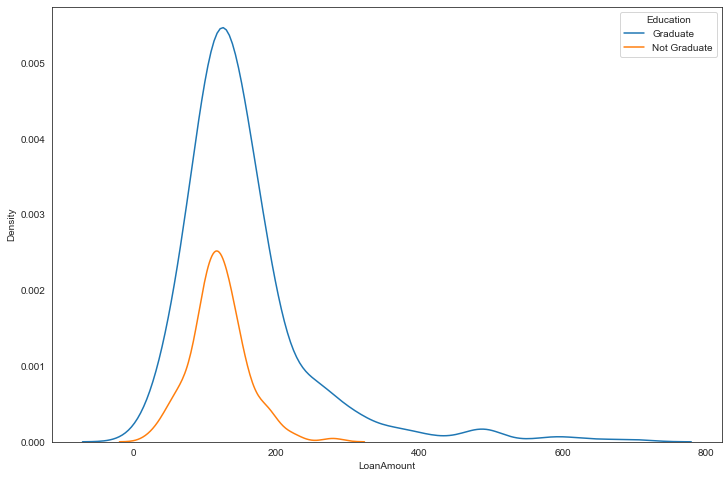

In [21]:
plt.figure(figsize=(12,8))
sns.kdeplot(data = df, x = 'LoanAmount', hue = 'Education')
plt.show()

OBSERVATION: From the graph above, we can see that graduate applied for higher amount of loan as compared to not Graduate.

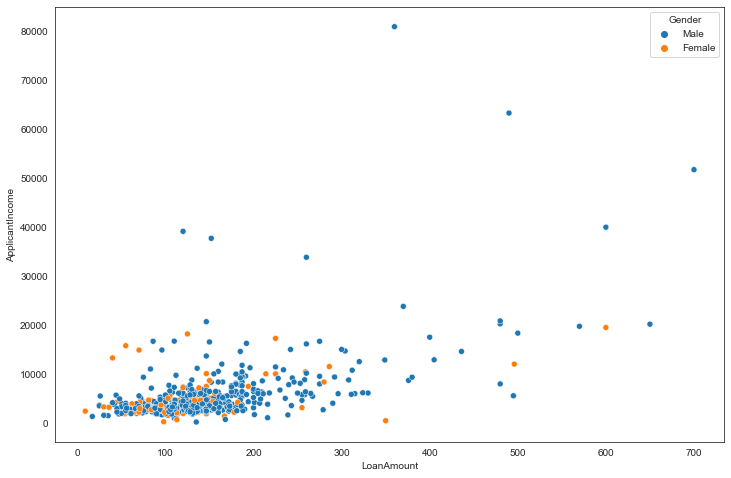

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = "LoanAmount", y = "ApplicantIncome", hue = "Gender", data = df)
plt.show()

OBSERVATION: From the scatter plot above we can deduce that male applied for higher amount of loan and male also had higher
    income compared to female. Male are also more represented in the dataset.

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

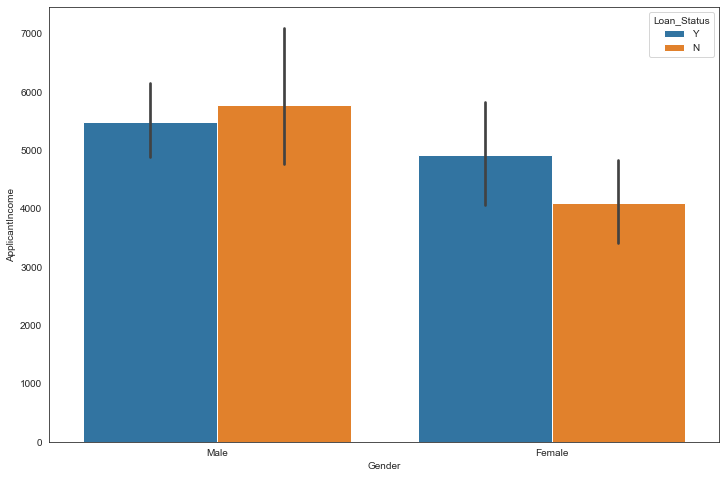

In [23]:
plt.figure(figsize= (12,8))
sns.barplot(x = "Gender", y = "ApplicantIncome", hue = "Loan_Status", data = df)

OBSERVATION: From the graph above, we can see that male had higher income and they also have more advantage in the
    loan status as compared to female.

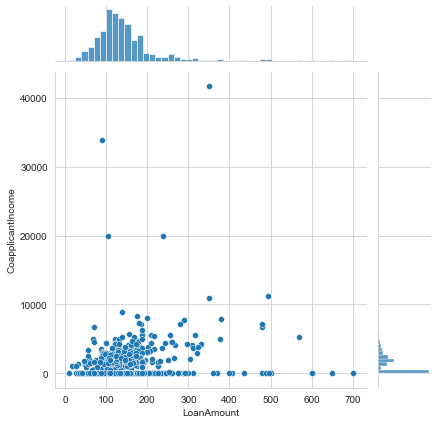

In [24]:
sns.set_style("whitegrid")
sns.jointplot(x="LoanAmount", y = "CoapplicantIncome", data=df)

OBSERVATION:From the jointplot above, we can see that coapplicant income between 0 and 10000 applied for smaller amount of loan.

**BUILDING OUR MODEL**

LABEL ENCODING

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler

In [26]:
lab_encode = LabelEncoder()
var_mode = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]
for i in var_mode:
    df[i] = lab_encode.fit_transform(df[i])

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


ONE HOT ENCODING

In [28]:
df1 = pd.concat([df, pd.get_dummies(df["Gender"], prefix = "gender")],axis = 1)
df1.drop(["Gender"],axis = 1, inplace = True)
df2 = pd.concat([df1, pd.get_dummies(df1["Married"], prefix = "married")], axis = 1)
df2.drop(["Married"], axis = 1, inplace = True)
df3 = pd.concat([df2, pd.get_dummies(df2["Dependents"], prefix = "dep")], axis = 1)
df3.drop(["Dependents"], axis = 1, inplace = True)
df4 = pd.concat([df3,pd.get_dummies(df3["Education"], prefix= "Edu")], axis = 1)
df4.drop(["Education"], axis = 1, inplace = True)
df5 = pd.concat([df4, pd.get_dummies(df4["Self_Employed"], prefix = "self_emp")], axis = 1)
df5.drop(["Self_Employed"],axis = 1, inplace = True)
df6 = pd.concat([df5, pd.get_dummies(df5["Property_Area"], prefix = "prop_area")], axis = 1)
df6.drop(["Property_Area"], axis = 1, inplace = True)
df7 = pd.concat([df6, pd.get_dummies(df6["Loan_Status"], prefix = "loan_sta")], axis = 1)
df7.drop(["Loan_Status"],axis = 1, inplace = True)


In [29]:
df7.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,gender_0,gender_1,married_0,married_1,dep_0,...,dep_3,Edu_0,Edu_1,self_emp_0,self_emp_1,prop_area_0,prop_area_1,prop_area_2,loan_sta_0,loan_sta_1
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1


In [30]:
x = df.loc[:, df.columns != "Loan_Status"]
y = df["Loan_Status"]

In [31]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [32]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [33]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [34]:
log = LogisticRegression()

In [35]:
log.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred = log.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.7886178861788617

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [39]:
confusion_matrix(y_test,y_pred)

array([[18, 25],
       [ 1, 79]], dtype=int64)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators=300, criterion = "entropy", max_features="sqrt",min_samples_leaf=10,random_state=100).fit(X_train,y_train)

In [42]:
prediction = rf.predict(X_test)

In [43]:
accuracy_score(y_test, prediction)

0.7886178861788617

In [44]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
n_estimators=[int (x) for x in np.linspace(start=200, stop = 2000, num = 10)]
max_depth = [int (x) for x in np.linspace(10,1000,10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]
random_grid = {"n_estimators": n_estimators,
               "max_depth": max_depth,
               "min_samples_split": min_samples_split,
               "min_samples_leaf": min_samples_leaf,
               "criterion":["entropy", "gini"]}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [49]:
rfc = RandomForestClassifier()

In [50]:
rf_randomcv = RandomizedSearchCV(estimator = rfc, param_distributions= random_grid, n_iter = 100, cv = 3, verbose = 2,random_state = 100, n_jobs = -1)

In [51]:
rf_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [52]:
rf_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_depth': 120,
 'criterion': 'entropy'}

In [53]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [54]:
best_random_grid = rf_randomcv.best_estimator_

In [55]:
y_predict = best_random_grid.predict(X_test)

In [56]:
accuracy_score(y_test, y_predict)

0.7886178861788617

In [57]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [59]:
from sklearn.metrics import f1_score

In [60]:
print(f1_score(y_test, y_predict))

0.8586956521739131
